In [3]:
try:
  from pathlib import Path
except ImportError:
  from pathlib2 import Path  # python 2 backportimport MDAnalysis
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

In [81]:
# add trajectory files after the gro
structure = f'/Users/chris/Documents/Work/Research/Projects/Oxidised_lipids/oxidised_PC/results/pc25_opc25_chl50/w_bodipy/r1/step7_1.gro'
trajectory = f'/Users/chris/Documents/Work/Research/Projects/Oxidised_lipids/oxidised_PC/results/pc25_opc25_chl50/w_bodipy/r1/step7_1.xtc'

u=mda.Universe(structure,trajectory)

In [82]:
len(u.trajectory)

2001

In [83]:

z_angle=[]
for ts in u.trajectory:
    

    #define z vector
    z=np.array([0,0,1])


    #select headgroup atom
    b1=u.select_atoms('name B1 and resname BODP')
    #select tail atom
    c25=u.select_atoms('name C25 and resname BODP')



    b1_to_c25=(c25.positions-b1.positions)[0]
    # check for pbc
    for i in range(3):
        if abs(b1_to_c25[i])>u.dimensions[i]/2:

            if b1_to_c25[i]>0:
                b1_to_c25[i]=b1_to_c25[i]-u.dimensions[i]
                print(b1_to_c25[i])
                break
            if b1_to_c25[i]<0:
                b1_to_c25[i]=b1_to_c25[i]+u.dimensions[i]


    #these are angles wrt to z
    costheta=np.dot(b1_to_c25,z)/(np.linalg.norm(b1_to_c25))
    theta=np.arccos(costheta)*180/np.pi

    z_angle.append(costheta)

-2.6036682
-11.65522
-5.8016357
-10.590881
-4.5395203
-8.599014
-13.773445
-12.091278
-11.77549
-10.791092
-17.136742
-14.108772
-8.3953705
-14.047119
-15.554428
-10.660248
-10.674011
-12.876724
-7.3324585
-17.17286
-10.157608
-3.0587692
-12.614265
-1.8093414
-15.962105
-12.408081
-10.277794
-12.079102
-11.086006
-10.490334
-9.831642
-10.986801
-10.829025
-10.664917
-8.644463
-11.235184
-10.443901
-7.806038
-9.868202
-8.893402
-6.794731
-10.573555
-8.559288
-9.2808075
-10.535881
-13.427605
-14.2799225


In [84]:

internal_angle_=[]
for ts in u.trajectory:
    

    #select headgroup atom
    b1=u.select_atoms('name B1 and resname BODP')
    #select tail atom
    c25=u.select_atoms('name C25 and resname BODP')
    #select midle atom
    o1=u.select_atoms('name O1 and resname BODP')




    o1_to_b1=(o1.positions-b1.positions)[0]
    # check for pbc
    for i in range(3):
        if abs(o1_to_b1[i])>u.dimensions[i]/2:

            if o1_to_b1[i]>0:
                o1_to_b1[i]=o1_to_b1[i]-u.dimensions[i]
                print(b1_to_c25[i])
                break
            if o1_to_b1[i]<0:
                o1_to_b1[i]=o1_to_b1[i]+u.dimensions[i]


    c25_to_01=(o1.positions-c25.positions)[0]
    # check for pbc
    for i in range(3):
        if abs(c25_to_01[i])>u.dimensions[i]/2:

            if c25_to_01[i]>0:
                c25_to_01[i]=c25_to_01[i]-u.dimensions[i]
                print(c25_to_01[i])
                break
            if c25_to_01[i]<0:
                c25_to_01[i]=c25_to_01[i]+u.dimensions[i]


    #these are angles wrt to z
    costheta=np.dot(c25_to_01,o1_to_b1)/(np.linalg.norm(c25_to_01)*np.linalg.norm(o1_to_b1))
    theta=np.arccos(costheta)*180/np.pi
    internal_angle_.append(costheta)


-18.309998
-2.485382
-5.1799927
-7.931328
-5.9972
-18.309998
-5.646736
-9.339111
-18.309998
-6.07325
-7.396118
-18.309998
-6.5822754
-18.309998
-18.309998
-18.309998
6.370001
6.370001
6.370001
6.370001
-1.1897354
-6.9341507
-18.309998
-18.309998
-9.846016
-18.309998
-18.309998
-2.2493591
-18.309998
-7.7710724
-18.309998
-18.309998
-18.309998
-8.991959
-7.5746307


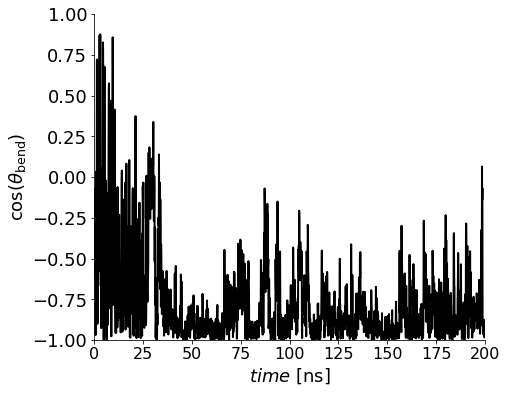

In [85]:
plt.rcParams.update({'font.size': 18})
fig=plt.figure(figsize=(7,6))
ax = plt.subplot(111)
x = [ts.time/1000 for ts in u.trajectory]
plt.plot(x,internal_angle_,color='black',lw=2)
plt.xlabel(r"$time \ [\rm{ns}]$")
plt.ylabel(r"$   \cos(\theta_{\rm{bend}})   $")
ax.tick_params(axis='x', which='major', labelsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim([0,200])
plt.ylim([-1,1])
plt.savefig('bend.pdf')
plt.show()

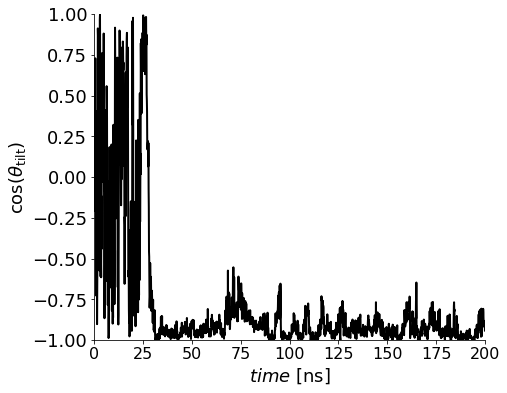

In [86]:
plt.rcParams.update({'font.size': 18})
fig=plt.figure(figsize=(7,6))
ax = plt.subplot(111)

plt.plot(x,z_angle,color='black',lw=2)
plt.xlabel(r"$time \ [\rm{ns}]$")
plt.ylabel(r"$   \cos(\theta_{\rm{tilt}})   $")
ax.tick_params(axis='x', which='major', labelsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim([0,200])
plt.ylim([-1,1])
plt.savefig('tilt.pdf')
plt.show()

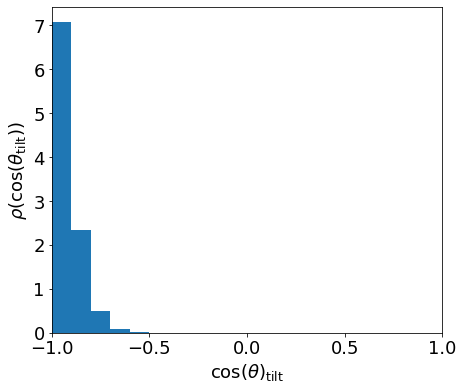

In [87]:
plt.rcParams.update({'font.size': 18})
fig=plt.figure(figsize=(7,6))
ax = plt.subplot(111)
zp = z_angle[500:]
plt.hist(zp,bins=np.arange(-1,1.001,0.1), density=True)
plt.xlabel(r"$\cos(\theta)_{\rm{tilt}}$")
plt.xlim([-1,1])
plt.ylabel(r"$\rho(\cos(\theta_{\rm{tilt}}))   $")
plt.savefig('hist_tilt_angle.pdf')
plt.show()

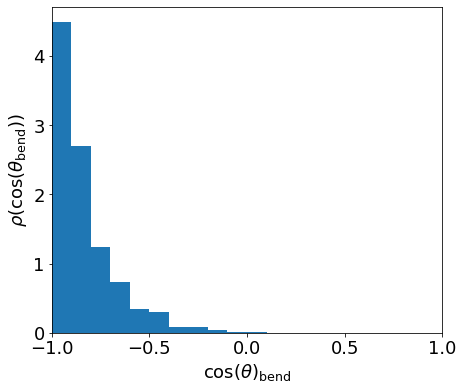

In [88]:
plt.rcParams.update({'font.size': 18})
fig=plt.figure(figsize=(7,6))
ax = plt.subplot(111)
ip = internal_angle_[500:]
plt.hist(ip,bins=np.arange(-1,1.001,0.1), density=True)
plt.xlabel(r"$\cos(\theta)_{\rm{bend}}$")
plt.xlim([-1,1])
plt.ylabel(r"$\rho(\cos(\theta_{\rm{bend}}))   $")
plt.savefig('hist_bend_angle.pdf')
plt.show()